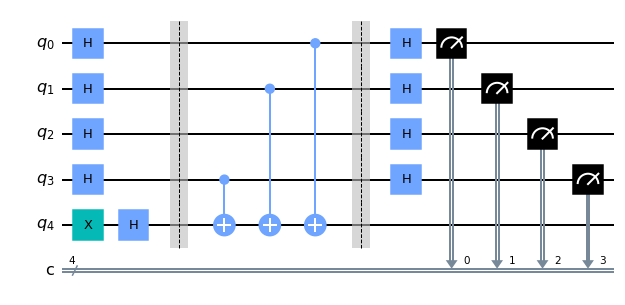

In [1]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np

n =4  # number of qubits used to represent s
s = '1011'   # the hidden binary string

# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)



# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    


# put ancilla in state 
bv_circuit.x(n)
bv_circuit.h(n)

# Apply barrier 
bv_circuit.barrier()

# Oracle to implement bit string multiplication
 # reverse s to fit qiskit's qubit ordering
i=n-1
for q in s:
    if q == '1':
        bv_circuit.cx(i, n)
    i-=1
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

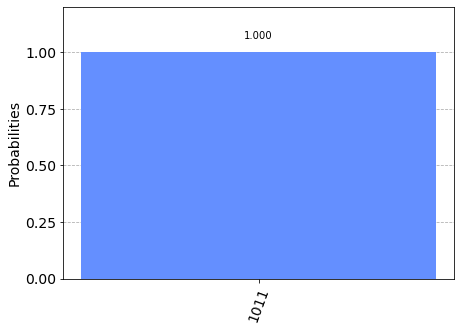

In [2]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
job = execute(bv_circuit, backend=backend, shots=shots)
results=job.result()
answer = results.get_counts()

plot_histogram(answer)

In [3]:
from qiskit import IBMQ


IBMQ.save_account('e2a6f8a4bcd77b47dd7a400db5510bc583b0a23b444a7a3dffe08f077cdbdbd4eb98150fc5541a72173ee7d10aacc13a0c068537ec6274ffba9c5e42efd303d5', overwrite=True)

In [4]:
provider=IBMQ.load_account()
backend=provider.get_backend('ibmq_quito')

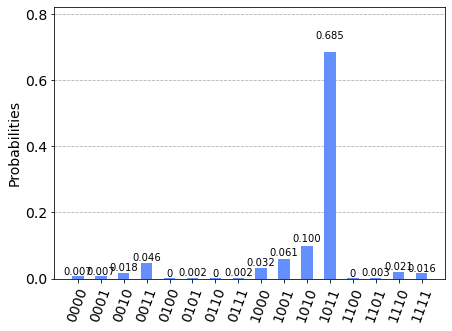

In [5]:
job = execute(bv_circuit, backend=backend, shots=1024)
counts=job.result().get_counts()
plot_histogram(counts)